In [2]:
import my_lib as my
import matplotlib.pyplot as plt
import numpy as np
import scipy as s
import pandas as pd
from scipy import stats
from math import log10, floor,pi,sqrt,tan

m=0.001
u=0.000001
n=0.000000001
p=0.000000000001
k=1000
M=1000000
G=1000000000
T=1000000000000

def Pw2(x):
    return np.power(x,2)


In [3]:
# Pt1 Formule e costanti

#  coo = 4*(f/pi)**2
#  f = pi*sqrt(coo/4)

# b = 2*pi/(Vx[max1] - Vx[max0] ) = 2*pi/( (N-1)*(Vx[maxN]-Vx[max0]))


def coo_th(R1,R2):
    Rm = np.sqrt(R1*R2)
    coo = 4*Rm/Pw2(1-Rm,2)
    return coo

def Airy_fit(x,coo,b,a,phi,c): # x: Vx[mV]
    I = a/(1+4*coo*Pw2(np.sin(b*x/2 + phi))) + c
    return I

Text(0, 0.5, 'I [V]')

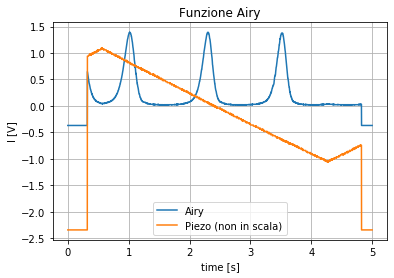

In [8]:
R1 = 0.92
R2 = 0.92

df1 = pd.read_csv('PrimaCH1.csv')
CH1  = np.asarray(df1.iloc[:,4])


df2 = pd.read_csv('PrimaCH2.csv')
t = np.asarray(df2.iloc[:,3])
CH2  = np.asarray(df2.iloc[:,4])




plt.plot(t,CH2,label = 'Airy')
plt.plot(t,CH1/10,label = 'Piezo (non in scala)')
plt.grid()
#plt.xlim(2.2,2.35)
#plt.ylim(1.34,1.4)
plt.title('Funzione Airy')
plt.xlabel('time [s]')
plt.legend()
plt.ylabel('I [V]')

In [41]:
# Pt2 Formule e costanti



def f_sp(diff_max,DeltaV):
    f = diff_max/(DeltaV)
    return f

def f_th(R1,R2):
    Rm = np.sqrt(R1*R2)
    f = pi*np.sqrt(Rm)/(1-Rm)
    return f

def cr_sp(Vmin,Vmax):
    cr = Vmax/Vmin
    return cr
    
def cr_th(R1,R2):
    Rm = np.sqrt(R1*R2)
    cr = Pw2( (1+Rm)/(1-Rm) )
    return cr

R1 = np.asarray([92,95,85,80,90])
R2 = np.asarray([95,95,85,85,90])

#Imax = np.asarray([,,,,])
#Imin = np.asarray([,,,,])

#diff_max = np.asarray([,,,,])
#Mezzo = np.asarray([,,,,])

fexp = f_sp(7600,400)
fth = f_th(0.90,0.90)

crexp = cr_sp(0.020,3.31)
crth = cr_th(0.90,0.90)

print('f th =',fth)
print('f ex =',fexp)
print('cr th =',crth)
print('cr ex =',crexp)

f th = 29.803764797388308
f ex = 19.0
cr th = 361.0000000000001
cr ex = 165.5


In [ ]:
Rm = np.sqrt(R1*R2)

plt.plot(Rm,fexp)
plt.plot(Rm,fth)
plt.grid()

In [13]:
# Per singola combinazione di R1,R2

#Servono: R1,R2, Vx,Vy, Vx[maxs] => Vmaxs

Values,sValues = my.intersect(Vmax/2,Vx,Vy,sdx = sVx,sdy = sVy,plot = True)

dV = np.asarray([])
sdV = np.asarray([])

for n in range(len(Vmaxs)):
    DeltaV = Values[n*2+1] - Values[n*2]
    sDeltaV = my.sqrt_sum(sValues[n+1],sValues[n])
    dV = np.append(dV,DeltaV)
    sdV = np.append(sdV,sDeltaV)

dMax = np.asarray([])
sdMax = np.asarray([])
    
for n in range(len(Vmaxs)-1):
    diff_max = Vmaxs[n+1] - Vmaxs[n]
    sdiff_max = my.sqrt_sum(sVmaxs[n+1],sVmaxs[n])
    dMax = np.append(dMax,diff_max)
    sdMax = np.append(sdMax,sdiff_max)

    
DeltaV = np.sum(dV)/len(dV)
sDeltaV = my.sqrt_sum(sdV)/len(sdV)
diff_max = np.sum(dMax)/len(dMax)
sdiff_max = np.sum(sdMax)/len(sdMax)    

Finess_exp = f_sp(diff_max,DeltaV)

Finess_th  = f_th(R1,R2)


NameError: name 'Vmax' is not defined

In [14]:
# Pt3 Formule e costanti

def Ordine(t1,t2):
    n = 2/( (t1-t2)*(t1+t2) )
    return n

def lenght(n,L):
    d = n*L/2
    return d